## Model Training

#### 1.2 Important data and required packages

In [51]:
# basic import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import warnings
warnings.filterwarnings("ignore")

###### import CSV data as the panda dataframe

In [17]:
df=pd.read_csv("data\stud.csv")

##### show top 5 recordas

In [19]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##### Prepareing X and Y variables

In [21]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
x=df.drop(columns=["average"],axis=1)
y=df["average"]

In [28]:
#pring the different categories in different features
print("categories in gender column:",end=" ")
print(df["gender"].unique())
print("categories in 'race_ethnicity' column:",end=" ")
print(df["race_ethnicity"].unique())
print("categories in 'parental_level_of_education' column:",end=" ")
print(df["parental_level_of_education"].unique())
print("lunch:",end=" ")
print(df["lunch"].unique())
print("categories in 'test_preparation_course' column:",end=" ")
print(df["test_preparation_course"].unique())

categories in gender column: ['female' 'male']
categories in 'race_ethnicity' column: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' column: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch: ['standard' 'free/reduced']
categories in 'test_preparation_course' column: ['none' 'completed']


In [36]:
num_feature=x.select_dtypes(exclude="object").columns
cat_feature=x.select_dtypes(include="object").columns
                           
                           
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
[
    ("OneHotEncoder",oh_transformer,cat_feature),
    ("StandardScaler",numeric_transformer,num_feature),
]

)
                           

In [40]:
x=preprocessor.fit_transform(x)

In [42]:
x.shape

(1000, 21)

In [45]:
#separate dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 21)
(200, 21)
(800,)
(200,)


##### create an evaluate function to give all metrics after model training

In [46]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2score=r2_score(true,predicted)
    return mae,mse,rmse,r2score

In [60]:
models={"Linear Regression":LinearRegression(),
        "Lasso":Lasso(),
        "Ridge":Ridge(),
        "K Neighbors Regressor":KNeighborsRegressor(),
        "DecisionTree":DecisionTreeRegressor(),
        "Random Forest Regressor":RandomForestRegressor(),
        "AdaBoost Regressor":AdaBoostRegressor()}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
               
    #make prediction
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
               
    #evaluate train and test dataset
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2score=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2score=evaluate_model(y_test,y_test_pred) 
               
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("model performance for the training dataset")
    print(f"mean absolute error:{model_train_mae}")
    print(f"mean squarred error:{model_train_mse}")
    print(f"mean absolute error:{model_train_mae}")
    print(f"r2_score:{model_train_r2score}")
    
    print("--------------------------------------")
    
    print("model performance for the testing dataset")
    print(f"mean absolute error:{model_test_mae}")
    print(f"mean squarred error:{model_test_mse}")
    print(f"mean absolute error:{model_test_mae}")
    print(f"r2_score:{model_test_r2score}")
    r2_list.append(model_test_r2score)
    print("="*50)

Linear Regression
model performance for the training dataset
mean absolute error:1.27675647831893e-14
mean squarred error:2.7346652140391597e-28
mean absolute error:1.27675647831893e-14
r2_score:1.0
--------------------------------------
model performance for the testing dataset
mean absolute error:1.2594369991347776e-14
mean squarred error:2.523723807983061e-28
mean absolute error:1.2594369991347776e-14
r2_score:1.0
Lasso
model performance for the training dataset
mean absolute error:0.8075024891061073
mean squarred error:1.0181431180112792
mean absolute error:0.8075024891061073
r2_score:0.9948952319583939
--------------------------------------
model performance for the testing dataset
mean absolute error:0.8311744383271829
mean squarred error:1.114557814977185
mean absolute error:0.8311744383271829
r2_score:0.9948006919534692
Ridge
model performance for the training dataset
mean absolute error:0.004750439675793952
mean squarred error:3.4394784687341684e-05
mean absolute error:0.00475

##### Result

In [62]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["modl_name","r2_score"]).sort_values(by=["r2_score"],ascending=False)

,modl_name,r2_score
0,Linear Regression,1.000000
2,Ridge,1.000000
4,DecisionTree,0.997916
5,Random Forest Regressor,0.996472
1,Lasso,0.994801
6,AdaBoost Regressor,0.991468
3,K Neighbors Regressor,0.966842


In [ ]:
-->decision tree is performing well

In [69]:
dt_model =DecisionTreeRegressor()
dt_model = dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f"%score)

 Accuracy of the model is 99.78


##### Plotting y_pred and y_test

Text(0, 0.5, 'predicted')

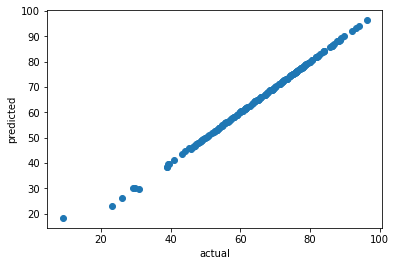

In [72]:
plt.scatter(y_test,y_pred);
plt.xlabel("actual")
plt.ylabel("predicted")

<AxesSubplot:xlabel='average'>

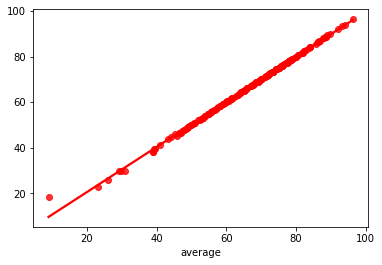

In [74]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

In [76]:
pred_df=pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred,"difference":y_test-y_pred})
pred_df

,actual_value,predicted_value,difference
521,87.000000,87.000000,0.0
737,64.000000,64.000000,0.0
740,75.000000,75.000000,0.0
660,74.666667,74.666667,0.0
411,81.666667,81.666667,0.0
...,...,...,...
408,55.000000,55.000000,0.0
332,57.000000,57.000000,0.0
208,77.000000,77.000000,0.0
613,72.000000,72.000000,0.0
